In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


OverView
The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more

In [3]:
df_wk  = pd.read_csv('Workation Train.csv')
df_temp = df_wk.copy()
df_wk.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [4]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [5]:
df_wk.shape

(21000, 15)

In [6]:
df_wk.isna().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [7]:
df_wk[df_wk.duplicated] # no duplicate but actiually their are but in simple process we cant see

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price


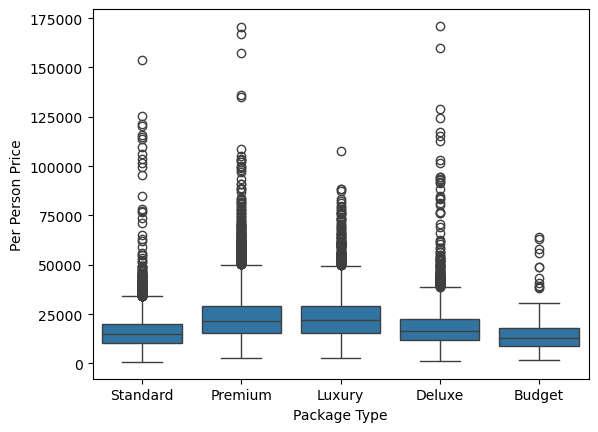

In [8]:
sns.boxplot(data=df_wk,x='Package Type',y='Per Person Price')
plt.show()

In [9]:
df_wk.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [10]:
df_wk['Destination'][0].split('|')

['New Delhi', 'Shimla', 'Manali', 'Chandigarh']

In [11]:
df_wk['Destination'][1566].split('|')

['Jaipur']

In [12]:
# so we have to do it for the whole column to split the data
df_wk['Destination'].apply(lambda x:len(x.split('|')))

0        4
1        3
2        2
3        4
4        2
        ..
20995    3
20996    4
20997    1
20998    3
20999    3
Name: Destination, Length: 21000, dtype: int64

In [13]:
df_wk['Sightseeing Places Covered'].apply(lambda x:len(x.split('|')))

0         1
1         7
2         8
3         9
4         2
         ..
20995    12
20996     9
20997     2
20998    22
20999     8
Name: Sightseeing Places Covered, Length: 21000, dtype: int64

In [14]:
df_temp['Sightseeing Places Covered']

0                                            Not Available
1         Dal Lake | Avantipura Ruins | Mughal Gardens ...
2         Lake Pichola | Jag Mandir Palace | Saheliyon ...
3         Mattupetty Dam | Echo Point | Tata Tea Museum...
4         Coral Island Tour with Indian Lunch, Join Spe...
                               ...                        
20995     Mall road | Indira Bunglow | Himalayan Zoo | ...
20996     Dal Lake | Gondola Point | Avantipura Ruins |...
20997         Sigiriya Excursion | Nuwara Eliya Excursion 
20998     Tiger Hill | Himalayan Mountaineering Institu...
20999     Tata Tea Museum | Eravikulam national park | ...
Name: Sightseeing Places Covered, Length: 21000, dtype: object

In [15]:
#testing the function working or not in temp file 

df_temp['count'] = [0 if word.strip()=='Not Available' else len(word.split('|'))
                   for word in df_temp['Sightseeing Places Covered']]

In [16]:
df_temp[['Sightseeing Places Covered','count']]

,Sightseeing Places Covered,count
0,Not Available,0
1,Dal Lake | Avantipura Ruins | Mughal Gardens ...,7
2,Lake Pichola | Jag Mandir Palace | Saheliyon ...,8
3,Mattupetty Dam | Echo Point | Tata Tea Museum...,9
4,"Coral Island Tour with Indian Lunch, Join Spe...",2
...,...,...
20995,Mall road | Indira Bunglow | Himalayan Zoo | ...,12
20996,Dal Lake | Gondola Point | Avantipura Ruins |...,9
20997,Sigiriya Excursion | Nuwara Eliya Excursion,2
20998,Tiger Hill | Himalayan Mountaineering Institu...,22


In [17]:
# it is working we can make the 
df_wk['Sightseeing Places Covered'] = df_wk['Sightseeing Places Covered'].apply(lambda x:0 if str(x).strip() == 'Not Available' else len(str(x).split('|')))

In [18]:
df_wk.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,0,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,7,Cancellation any time after making the 1st pay...,22485.5


In [19]:
df_wk['Airline']

0                      Not Available
1                      IndiGo|IndiGo
2                             IndiGo
3                             IndiGo
4                    Spicejet|Go Air
                    ...             
20995                  Not Available
20996                Vistara|Vistara
20997    IndiGo|IndiGo|IndiGo|IndiGo
20998                         IndiGo
20999                         IndiGo
Name: Airline, Length: 21000, dtype: object

In [20]:
# same for airline also 

df_wk['Airline'] = df_wk['Airline'].apply(lambda x:0 if str(x).strip() == 'Not Available' else len(str(x).split('|')))
df_wk['Airline']

0        0
1        2
2        1
3        1
4        2
        ..
20995    0
20996    2
20997    4
20998    1
20999    1
Name: Airline, Length: 21000, dtype: int64

In [21]:
df_wk['Airline'].describe()

count    21000.000000
mean         1.218714
std          1.074545
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: Airline, dtype: float64

In [22]:
df_wk[df_wk['Airline']==11].index[0]

8634

In [23]:
df_wk['Airline']

0        0
1        2
2        1
3        1
4        2
        ..
20995    0
20996    2
20997    4
20998    1
20999    1
Name: Airline, Length: 21000, dtype: int64

In [24]:
df_wk['Airline_Cat'] = ['unknown' if x < 1 else 'Single Flight' if  x < 2 else 'Multiple Flight' for x in df_wk['Airline']]
df_wk[['Airline_Cat']]

,Airline_Cat
0,unknown
1,Multiple Flight
2,Single Flight
3,Single Flight
4,Multiple Flight
...,...
20995,unknown
20996,Multiple Flight
20997,Multiple Flight
20998,Single Flight


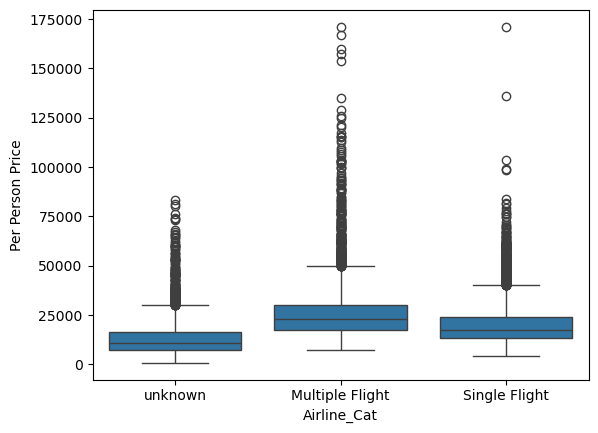

In [25]:
sns.boxplot(data = df_wk,x='Airline_Cat',y='Per Person Price')
plt.show()

In [26]:
single = df_wk.loc[df_wk['Airline_Cat']=='Single Flight','Per Person Price']

In [27]:
multiple = df_wk.loc[df_wk['Airline_Cat']=='Multiple Flight','Per Person Price']

In [28]:
# perform t test 
from scipy.stats import stats
stats.ttest_ind(single,multiple)

TtestResult(statistic=-32.81410134270102, pvalue=1.188715248556533e-228, df=16088.0)

**Reject null hypothesis : their is  significant change in per person price wth airline cat**

In [30]:
import re

In [31]:
# itinery as we see their is lot of coplication in the data soo forst we dplit by .

df_wk['Itinerary'].apply(lambda x: (x.split('.')))

0        [1N New Delhi ,  2N Shimla ,  2N Manali ,  1N ...
1              [1N Srinagar ,  2N Pahalgam ,  1N Srinagar]
2                           [2N Udaipur ,  1N Chittorgarh]
3        [2N Munnar ,  1N Kumarakom ,  1N Allepey ,  2N...
4                               [4N Pattaya ,  3N Bangkok]
                               ...                        
20995             [2N Shimla ,  3N Manali ,  1N New Delhi]
20996    [1N Srinagar ,  1N Gulmarg ,  2N Pahalgam ,  3...
20997                                         [5N Colombo]
20998          [2N Darjeeling ,  2N Pelling ,  2N Gangtok]
20999              [3N Munnar ,  2N Kovalam ,  1N Allepey]
Name: Itinerary, Length: 21000, dtype: object

In [32]:
df_wk['Itinerary'][0]

'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

In [33]:
re.findall('\d+',df_wk['Itinerary'][0])

['1', '2', '2', '1']

In [34]:
pd.to_numeric(re.findall('\d+',df_wk['Itinerary'][0]))

array([1, 2, 2, 1], dtype=int64)

In [35]:
pd.to_numeric(re.findall('\d+',df_wk['Itinerary'][0])).sum()

6

In [36]:
def travel(text):
    duration = pd.to_numeric(re.findall('\d+',text)).sum()
    return duration

df_wk['Duration'] = df_wk['Itinerary'].apply(travel)

In [37]:
df_wk

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Airline_Cat,Duration
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,0,2,3,0,Not Available,11509.0,unknown,6
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,2,0,5,7,Cancellation any time after making the 1st pay...,22485.5,Multiple Flight,4
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,1,0,4,8,Cancellation any time after making the 1st pay...,12421.5,Single Flight,3
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,1,0,5,9,Cancellation any time after making the 1st pay...,35967.0,Single Flight,6
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,2,0,5,2,Cancellation any time after making the 1st pay...,25584.0,Multiple Flight,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,ae3ae6ca299180d470145a0e154cbf2b,Shimla & Manali Retreat from Delhi,Deluxe,Shimla|Manali|New Delhi,2N Shimla . 3N Manali . 1N New Delhi,Shimla|Manali|New Delhi,15-04-2021,Summit Thistle Villa Resort & Spa:Four|Snow Va...,Mumbai,0,1,3,12,Cancellation any time after making the 1st pay...,16168.5,unknown,6
20996,6ccc538e3597a909f609fcb2eba9be5e,Bedazzling Kashmir Holiday,Luxury,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,30-08-2021,The Orchard Retreat & Spa:4.6|The Khyber Himal...,New Delhi,2,0,4,9,Cancellation any time after making the 1st pay...,33770.5,Multiple Flight,7
20997,d3b412fa94ce5503204024c6db2f60b7,A relaxing week in Colombo (Bentota and Galle ...,Deluxe,Colombo,5N Colombo,Colombo,27-02-2021,Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0,New Delhi,4,1,3,2,Cancellation any time after making the 1st pay...,29964.0,Multiple Flight,5
20998,51d843fb852ec7abde8299fe31111bd5,Awesome North East with Pelling,Deluxe,Darjeeling|Pelling|Gangtok,2N Darjeeling . 2N Pelling . 2N Gangtok,Darjeeling|Pelling|Gangtok,13-01-2022,Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...,New Delhi,1,1,3,22,Cancellation any time after making the 1st pay...,28145.5,Single Flight,6


In [38]:
df_wk['Hotel Details'][0]

'Not Available'

In [39]:
df_wk['Hotel Details'][121]

'Lemon Tree Hotel  Gangtok:4.3|Summit Alpine Resort, Lachung- MMT Holidays Special:4.3|Lemon Tree Hotel  Gangtok:'

In [40]:

df_wk['Hotel Details'].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5',
       'Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4',
       'Poppys Hotel:Four|Hyatt Place Rameswaram:Four|Vinayaga by Poppys:Three|Svatma:Four|Red Fox Hotel ,Trichy:Three|Kodai Resort Hotel:Four'],
      dtype=object)

In [41]:
example = "The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6 The Ananta:4.4|juSTa Lake Nahargarh Palace:4 Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5 Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4 Poppys Hotel:Four|Hyatt Place Rameswaram:Four|Vinayaga by Poppys:Three|Svatma:Four|Red Fox Hotel Trichy:Three|Kodai Resort Hotel:Four"

In [42]:
dict_nos = {'one': 1,'two': 2, 'three': 3, 'four': 4, 'five': 5,'six': 6, 'seven' : 7, 'eight' : 8 , 'nine' : 9 , 'ten' : 10 }

In [43]:
for match in dict_nos.keys():
    if match in example.lower():
        print(match)

three
four


In [44]:
def hotel(text):
    text = text.lower()
    if text.strip() == "not available":
        return 0 
    else:
        text=re.findall(":s*([\d\.]+|[a-zA-Z]+)",text)
        rating = []
    for match in text:
        if match in dict_nos:
            rating.append(dict_nos[match])
        else:
            try:
                rating.append(float(match))
            except ValueError:
                pass
            return (np.median(rating))  
        

In [45]:
df_wk["Hotel Rating"] = df_wk['Hotel Details'].apply(hotel)

In [46]:
df_wk["Hotel Rating"]

0        0.0
1        4.6
2        4.4
3        4.6
4        4.5
        ... 
20995    NaN
20996    4.6
20997    4.0
20998    4.4
20999    3.8
Name: Hotel Rating, Length: 21000, dtype: float64

In [47]:
df_wk

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Airline_Cat,Duration,Hotel Rating
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,0,2,3,0,Not Available,11509.0,unknown,6,0.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,2,0,5,7,Cancellation any time after making the 1st pay...,22485.5,Multiple Flight,4,4.6
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,1,0,4,8,Cancellation any time after making the 1st pay...,12421.5,Single Flight,3,4.4
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,1,0,5,9,Cancellation any time after making the 1st pay...,35967.0,Single Flight,6,4.6
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,2,0,5,2,Cancellation any time after making the 1st pay...,25584.0,Multiple Flight,7,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,ae3ae6ca299180d470145a0e154cbf2b,Shimla & Manali Retreat from Delhi,Deluxe,Shimla|Manali|New Delhi,2N Shimla . 3N Manali . 1N New Delhi,Shimla|Manali|New Delhi,15-04-2021,Summit Thistle Villa Resort & Spa:Four|Snow Va...,Mumbai,0,1,3,12,Cancellation any time after making the 1st pay...,16168.5,unknown,6,NaN
20996,6ccc538e3597a909f609fcb2eba9be5e,Bedazzling Kashmir Holiday,Luxury,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,30-08-2021,The Orchard Retreat & Spa:4.6|The Khyber Himal...,New Delhi,2,0,4,9,Cancellation any time after making the 1st pay...,33770.5,Multiple Flight,7,4.6
20997,d3b412fa94ce5503204024c6db2f60b7,A relaxing week in Colombo (Bentota and Galle ...,Deluxe,Colombo,5N Colombo,Colombo,27-02-2021,Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0,New Delhi,4,1,3,2,Cancellation any time after making the 1st pay...,29964.0,Multiple Flight,5,4.0
20998,51d843fb852ec7abde8299fe31111bd5,Awesome North East with Pelling,Deluxe,Darjeeling|Pelling|Gangtok,2N Darjeeling . 2N Pelling . 2N Gangtok,Darjeeling|Pelling|Gangtok,13-01-2022,Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...,New Delhi,1,1,3,22,Cancellation any time after making the 1st pay...,28145.5,Single Flight,6,4.4


In [48]:
# replce the null value in  hotel rating by mean 
df_wk.loc[df_wk['Hotel Rating'].isna(),'Hotel Rating'] = df_wk['Hotel Rating'].mean()

In [49]:
df_wk['Hotel Rating'].isna().sum()

0

In [50]:
# drop use less column 

df_wk = df_wk.drop(['Uniq Id','Itinerary','Places Covered','Hotel Details','Cancellation Rules'],axis=1)

In [51]:
df_wk.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [52]:
df_wk['pkgType_count'] = df_wk.groupby('Package Type')['Per Person Price'].transform('count')

df_wk['pkgType_mean'] = df_wk.groupby('Package Type')['Per Person Price'].transform('mean')

df_wk['pkgType_median'] = df_wk.groupby('Package Type')['Per Person Price'].transform('median')

df_wk['pkgType_max'] = df_wk.groupby('Package Type')['Per Person Price'].transform('max')

df_wk['pkgType_std'] = df_wk.groupby('Package Type')['Per Person Price'].transform('std')

In [53]:
df_wk.drop('Package Name',axis=1,inplace=True)

In [54]:
df_wk['Package Type'].value_counts() 

Package Type
Deluxe      6006
Standard    5669
Premium     5581
Luxury      3278
Budget       466
Name: count, dtype: int64

In [55]:
df_wk['pkgType_count'].value_counts() 

pkgType_count
6006    6006
5669    5669
5581    5581
3278    3278
466      466
Name: count, dtype: int64

In [56]:
df_wk['pkgType_mean'].value_counts() 


pkgType_mean
18409.508825    6006
16354.089081    5669
23965.407006    5581
23679.556437    3278
14151.447425     466
Name: count, dtype: int64

In [57]:
df_wk['pkgType_max'].value_counts()

pkgType_max
171062.5    6006
153795.0    5669
170763.0    5581
107850.0    3278
64008.5      466
Name: count, dtype: int64

In [58]:
df_wk['pkgType_std'].value_counts()

pkgType_std
10228.326587    6006
9363.498521     5669
13272.618593    5581
11958.923869    3278
8236.467588      466
Name: count, dtype: int64

In [59]:
df_wk['pkgType_median'].value_counts()

pkgType_median
16426.75    6006
14729.50    5669
21767.50    5581
22222.50    3278
13114.25     466
Name: count, dtype: int64

In [60]:
df_wk.head(1)

,Package Type,Destination,Travel Date,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Per Person Price,Airline_Cat,Duration,Hotel Rating,pkgType_count,pkgType_mean,pkgType_median,pkgType_max,pkgType_std
0,Standard,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Mumbai,0,2,3,0,11509.0,unknown,6,0.0,5669,16354.089081,14729.5,153795.0,9363.498521


In [61]:
mapped = {'Budget':1,'Standard':2,'Deluxe':3,'Luxury':4,'Premium':5}
df_wk['Package Type'] = df_wk['Package Type'].map(mapped)

In [62]:
df_wk['Package Type'].value_counts()

Package Type
3    6006
2    5669
5    5581
4    3278
1     466
Name: count, dtype: int64

In [63]:
df_wk

,Package Type,Destination,Travel Date,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Per Person Price,Airline_Cat,Duration,Hotel Rating,pkgType_count,pkgType_mean,pkgType_median,pkgType_max,pkgType_std
0,2,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Mumbai,0,2,3,0,11509.0,unknown,6,0.000000,5669,16354.089081,14729.50,153795.0,9363.498521
1,5,Srinagar|Pahalgam|Srinagar,08-12-2021,New Delhi,2,0,5,7,22485.5,Multiple Flight,4,4.600000,5581,23965.407006,21767.50,170763.0,13272.618593
2,4,Udaipur|Chittorgarh,26-04-2021,New Delhi,1,0,4,8,12421.5,Single Flight,3,4.400000,3278,23679.556437,22222.50,107850.0,11958.923869
3,5,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,New Delhi,1,0,5,9,35967.0,Single Flight,6,4.600000,5581,23965.407006,21767.50,170763.0,13272.618593
4,5,Pattaya|Bangkok,12-12-2021,New Delhi,2,0,5,2,25584.0,Multiple Flight,7,4.500000,5581,23965.407006,21767.50,170763.0,13272.618593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,3,Shimla|Manali|New Delhi,15-04-2021,Mumbai,0,1,3,12,16168.5,unknown,6,3.438646,6006,18409.508825,16426.75,171062.5,10228.326587
20996,4,Srinagar|Gulmarg|Pahalgam|Srinagar,30-08-2021,New Delhi,2,0,4,9,33770.5,Multiple Flight,7,4.600000,3278,23679.556437,22222.50,107850.0,11958.923869
20997,3,Colombo,27-02-2021,New Delhi,4,1,3,2,29964.0,Multiple Flight,5,4.000000,6006,18409.508825,16426.75,171062.5,10228.326587
20998,3,Darjeeling|Pelling|Gangtok,13-01-2022,New Delhi,1,1,3,22,28145.5,Single Flight,6,4.400000,6006,18409.508825,16426.75,171062.5,10228.326587


In [64]:
df_wk['Start City'].value_counts()

Start City
New Delhi    13733
Mumbai        7267
Name: count, dtype: int64

In [65]:
df_wk['Start City'] = df_wk['Start City'].apply(lambda x:1 if x.strip()=='New Delhi' else 0)

In [66]:
df_wk['Start City'].value_counts()

Start City
1    13733
0     7267
Name: count, dtype: int64

In [67]:
df_wk.drop('Package Type',axis=1,inplace=True)

In [68]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Destination                 21000 non-null  object 
 1   Travel Date                 21000 non-null  object 
 2   Start City                  21000 non-null  int64  
 3   Airline                     21000 non-null  int64  
 4   Flight Stops                21000 non-null  int64  
 5   Meals                       21000 non-null  int64  
 6   Sightseeing Places Covered  21000 non-null  int64  
 7   Per Person Price            21000 non-null  float64
 8   Airline_Cat                 21000 non-null  object 
 9   Duration                    21000 non-null  int64  
 10  Hotel Rating                21000 non-null  float64
 11  pkgType_count               21000 non-null  int64  
 12  pkgType_mean                21000 non-null  float64
 13  pkgType_median              210

In [69]:
df_wk['Travel Date'] = pd.to_datetime(df_wk['Travel Date'])

In [70]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Destination                 21000 non-null  object        
 1   Travel Date                 21000 non-null  datetime64[ns]
 2   Start City                  21000 non-null  int64         
 3   Airline                     21000 non-null  int64         
 4   Flight Stops                21000 non-null  int64         
 5   Meals                       21000 non-null  int64         
 6   Sightseeing Places Covered  21000 non-null  int64         
 7   Per Person Price            21000 non-null  float64       
 8   Airline_Cat                 21000 non-null  object        
 9   Duration                    21000 non-null  int64         
 10  Hotel Rating                21000 non-null  float64       
 11  pkgType_count               21000 non-null  int64     

In [71]:
df_wk['Year'] = df_wk['Travel Date'].dt.year
df_wk['Month'] = df_wk['Travel Date'].dt.month
df_wk['Date'] = df_wk['Travel Date'].dt.day

In [72]:
df_wk.head(2)

,Destination,Travel Date,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Per Person Price,Airline_Cat,Duration,Hotel Rating,pkgType_count,pkgType_mean,pkgType_median,pkgType_max,pkgType_std,Year,Month,Date
0,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,0,0,2,3,0,11509.0,unknown,6,0.0,5669,16354.089081,14729.5,153795.0,9363.498521,2021,7,30
1,Srinagar|Pahalgam|Srinagar,2021-12-08,1,2,0,5,7,22485.5,Multiple Flight,4,4.6,5581,23965.407006,21767.5,170763.0,13272.618593,2021,12,8


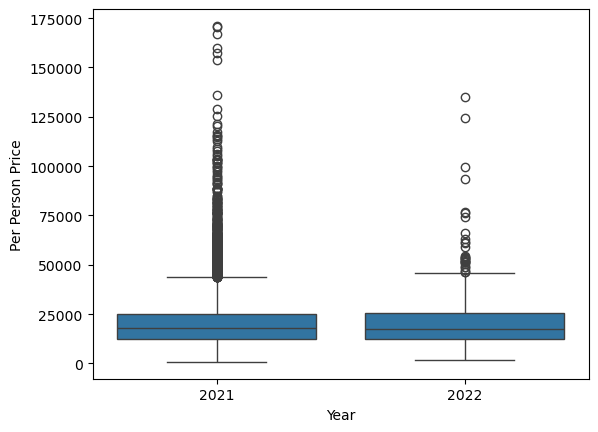

In [73]:
sns.boxplot(x=df_wk['Year'],y=df_wk['Per Person Price'])
plt.show()

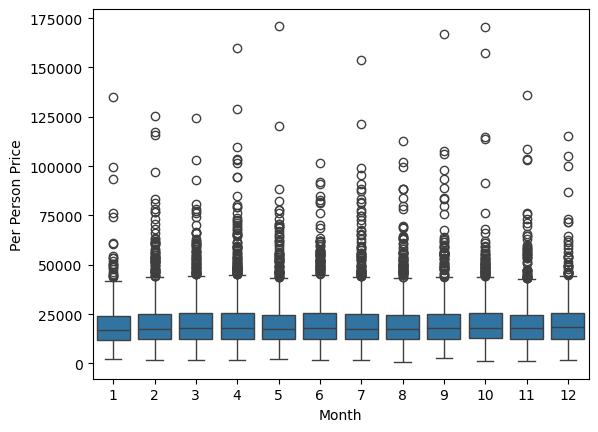

In [74]:
sns.boxplot(x=df_wk['Month'],y=df_wk['Per Person Price'])
plt.show()

In [75]:
# encoding year
mapped = {2021:1,2022:0}

df_wk['Year'] = df_wk['Year'].map(mapped)

In [76]:
df_wk['Year'].value_counts()

Year
1    20148
0      852
Name: count, dtype: int64

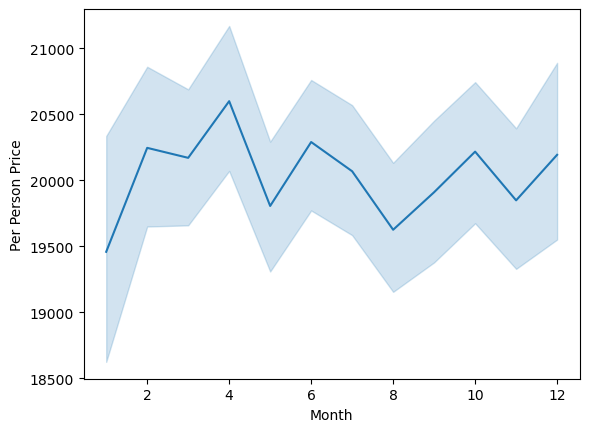

In [77]:
sns.lineplot(x='Month',y='Per Person Price',data=df_wk)
plt.show()

In [78]:
df_wk['weekday'] = df_wk['Travel Date'].dt.weekday
df_wk['weekday'].value_counts()

weekday
2    3015
5    3006
6    3005
4    3003
3    3002
1    2993
0    2976
Name: count, dtype: int64

In [79]:
max_price = df_wk.groupby('weekday')['Per Person Price'].max()

In [80]:
max_price.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='weekday')

In [81]:
max_price.values

array([120377.5, 108548.5, 171062.5, 153795. , 157143. , 166758. ,
       159740. ])

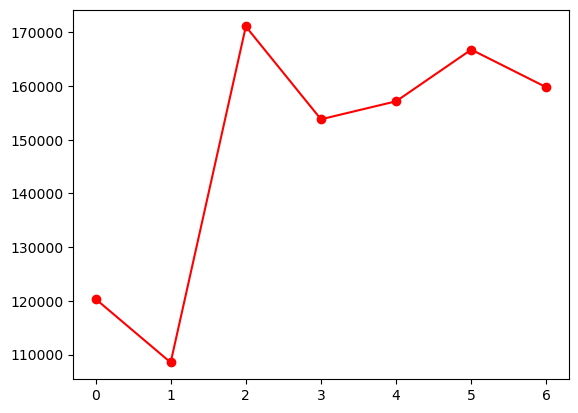

In [82]:
plt.plot(max_price.index,max_price.values,marker = 'o',c = 'r')
plt.show()

In [83]:
# lets see if the weekly have any relation 
peekday = {2,3,4,5,6}

def peak(x):
    if x in peekday:
        return 'Peak'
    else:
        return 'Non Peak'

In [84]:
df_wk['Peak_days'] = df_wk['weekday'].apply(peak)

In [85]:
df_wk['Peak_days'].value_counts()

Peak_days
Peak        15031
Non Peak     5969
Name: count, dtype: int64

In [86]:
peak = df_wk.loc[df_wk['Peak_days']=='Peak','Per Person Price']
Non_peak = df_wk.loc[df_wk['Peak_days']=='Non Peak','Per Person Price']

In [87]:
stats.ttest_ind(peak,Non_peak)

TtestResult(statistic=-0.26500888296442465, pvalue=0.7910052200643831, df=20998.0)

In [88]:
df_wk.drop(['Travel Date','Year'],axis=1,inplace=True)

In [89]:
df_wk.drop(['Month','Date'],axis=1,inplace=True)

In [90]:
df_wk.drop(['weekday','Peak_days'],axis=1,inplace=True)

In [91]:
df_wk.columns

Index(['Destination', 'Start City', 'Airline', 'Flight Stops', 'Meals',
       'Sightseeing Places Covered', 'Per Person Price', 'Airline_Cat',
       'Duration', 'Hotel Rating', 'pkgType_count', 'pkgType_mean',
       'pkgType_median', 'pkgType_max', 'pkgType_std'],
      dtype='object')

In [192]:
X= df_wk.drop('Per Person Price',axis=1)
y = df_wk['Per Person Price']

In [197]:
X=pd.get_dummies(X,drop_first=True).astype(float)

In [204]:
from sklearn.model_selection import train_test_split

In [206]:
df_wk.shape

(21000, 15)

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,random_state=42)

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [212]:
lr = LinearRegression()
gbm = GradientBoostingRegressor()

In [214]:
lr.fit(x_train,y_train)

LinearRegression()

In [216]:
gbm.fit(x_train,y_train)

GradientBoostingRegressor()

In [218]:
pred_lr= lr.predict(x_test)
pred_gbm= gbm.predict(x_test)

In [234]:
print('LinearRegression',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('GradientBoostingRegressor',np.sqrt(mean_squared_error(y_test,pred_gbm)))

LinearRegression 6376.763731005424
GradientBoostingRegressor 6742.841055236092


In [224]:
xgb = XGBRegressor()

In [226]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [228]:
pred_xgb = xgb.predict(x_test)

In [236]:
print('XGBRegressor',np.sqrt(mean_squared_error(y_test,pred_xgb)))

XGBRegressor 5776.293364599746
